# **Machine  Learning**

# Árvores de Decisão 

Neste projeto foi utlizado a base de dados heart.csv, do site Kaggle.com

In [1]:
# Importando as bibliotecas necessárias:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np

from google.colab import files

In [2]:
# Carregando a base de dados:
uploaded = files.upload() 
coracao= pd.read_csv('heart.csv')

Saving heart.csv to heart.csv


In [3]:
coracao.shape

(303, 14)

In [4]:
coracao.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
coreobj = coracao.drop('target', axis =1, inplace = True)


In [6]:
coracao.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
coracao2 = pd.read_csv('heart.csv')

In [8]:
alvo = coracao2.target

In [9]:
print(alvo)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


1 age

2 sex

3 chest pain type (4 values)

4 resting blood pressure

5 serum cholestoral in mg/dl

6 fasting blood sugar > 120 mg/dl

7 resting electrocardiographic results (values 0,1,2)

8 maximum heart rate achieved

9 exercise induced angina

10 oldpeak = ST depression induced by exercise relative to rest

11 the slope of the peak exercise ST segment

12 number of major vessels (0-3) colored by flourosopy

13 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [10]:
coracao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [11]:
coracao.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
# utilizando a função de treino_teste, podemos 'setar' o valor do nosso parametro do teste que é 0.50
X_train, X_test, y_train, y_test = train_test_split(coracao, alvo, test_size=0.50)

In [13]:
# aqui definimos a profundidade da nossa árvore, que será no máximo 3
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [14]:
# gerando a matriz de confusão 
print("\nMatriz de confusão detalhada:\n",
 pd.crosstab(y_test, predictions, rownames=['Real'], colnames=
['Predito'],
 margins=True, margins_name='Todos'))


Matriz de confusão detalhada:
 Predito   0   1  Todos
Real                  
0        46  30     76
1        13  63     76
Todos    59  93    152


In [15]:
# aqui será feito classificação principal quanto a nossa base de dados
import sklearn.metrics as metrics
print("Relatório sobre a qualidade:\n")
print(metrics.classification_report(y_test, predictions, target_names=['Tem doença', 'Nao tem doença']))

Relatório sobre a qualidade:

                precision    recall  f1-score   support

    Tem doença       0.78      0.61      0.68        76
Nao tem doença       0.68      0.83      0.75        76

      accuracy                           0.72       152
     macro avg       0.73      0.72      0.71       152
  weighted avg       0.73      0.72      0.71       152



Utilizando o Graphviz, será gerado a árvore de decisão do nosso modelo 

In [16]:
import graphviz


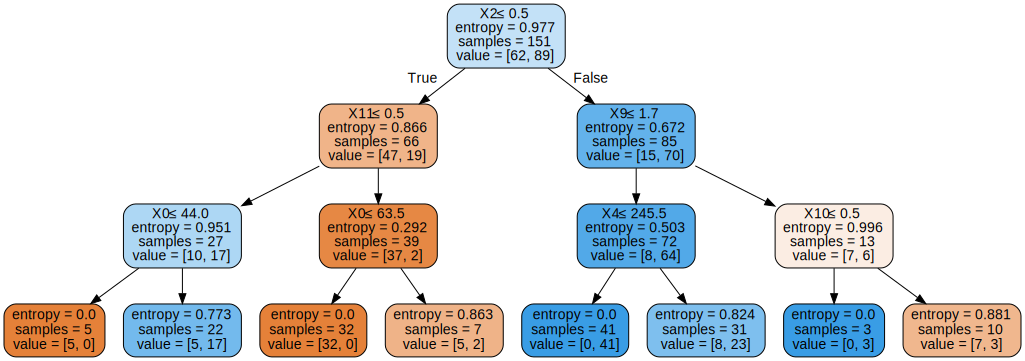

In [17]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("coracao")
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png")
graph